In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import seaborn as sns

# Data Understanding

In [3]:
DATA_PATH = Path('../../data')

In [4]:
df = pd.read_parquet(DATA_PATH.joinpath('processed', 'game_logs_standings_v2.parquet'))

In [5]:
df.columns.tolist()

['Date',
 'Attendance',
 'Gm#',
 'R',
 'RA',
 'Rank',
 'GB',
 'Streak_count',
 'W',
 'L',
 'VistingTeamScore',
 'HomeTeamScore',
 'NumberofOuts',
 'LengthofGame',
 'cLI',
 'DayNight',
 'DayofWeek',
 'BallParkID',
 'VisitingTeamOffense_AtBats',
 'VisitingTeamOffense_Hits',
 'VisitingTeamOffense_Doubles',
 'VisitingTeamOffense_Triples',
 'VisitingTeamOffense_Homeruns',
 'VisitingTeamOffense_RBIs',
 'VisitingTeamOffense_SacrificeHits',
 'VisitingTeamOffense_SacrificeFlies',
 'VisitingTeamOffense_HitbyPitch',
 'VisitingTeamOffense_Walks',
 'VisitingTeamOffense_IntentionalWalks',
 'VisitingTeamOffense_Strickouts',
 'VisitingTeamOffense_StolenBases',
 'VisitingTeamOffense_CaughtStealing',
 'VisitingTeamOffense_GroundedintoDoublePlay',
 'VisitingTeamOffense_AwardedFirstonCatcherInterference',
 'VisitingTeamOffense_LeftOnBase',
 'VisitingTeamPitchers_PitchersUsed',
 'VisitingTeamPitchers_IndividualEarnedRuns',
 'VisitingTeamPitchers_TeamEarnedRuns',
 'VisitingTeamPitchers_WildPitches',
 'Visit

In [6]:
df.shape

(52052, 99)

In [7]:
df.head()

,Date,Attendance,Gm#,R,RA,Rank,GB,Streak_count,W,L,VistingTeamScore,HomeTeamScore,NumberofOuts,LengthofGame,cLI,DayNight,DayofWeek,BallParkID,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,HomePlateUmp_ID,HomePlateUmp_Name,1BUmp_ID,1BUmp_Name,2BUmp_ID,2BUmp_Name,3BUmp_ID,3BUmp_Name,LFUmp_Name,RFUmp_Name,VisitingTeamManager_ID,VisitingTeamManager_Name,HomeTeamManager_ID,HomeTeamManager_Name,WinningPitcher_ID,WinningPitcher_Name,LosingPitcher_ID,LosingPitcher_Name,SavingPitcher_Name,GameWinningRBIBatter_ID,GameWinningRBIBatter_Name,VisitingTeam_StartingPitcher_ID,VisitingTeam_StartingPitcher_Name,HomeTeam_StartingPitcher_ID,HomeTeam_StartingPitcher_Name
0,2000-04-10,60021.0,7,4,8,3,3.0,-3,3,4,8,4,54,176,1.15,0.0,1.0,42.0,39,12,0,0,5,8,0,0,0,4,0,11,1,0,0,0,8,2,4,4,0,0,27,11,0,0,1,0,35,11,2,0,2,4,0,1,0,2,0,6,0,1,0,0,7,4,8,8,0,0,27,6,0,0,0,0,carlm901,Mark Carlson,demud901,Dana DeMuth,relic901,Charlie Reliford,eddid901,Doug Eddings,(none),(none),showb801,Buck Showalter,bochb002,Bruce Bochy,stott001,Todd Stottlemyre,willw001,Woody Williams,Mike Morgan,durae001,Erubiel Durazo,stott001,Todd Stottlemyre,willw001,Woody Williams
1,2000-04-11,19035.0,8,3,2,3,2.0,1,4,4,2,3,75,214,1.09,1.0,5.0,42.0,42,7,1,0,0,2,0,0,0,8,0,5,0,0,2,0,9,3,3,3,0,0,36,13,1,1,1,0,45,9,1,0,2,3,1,0,1,3,1,9,1,0,1,0,11,5,2,2,0,0,39,18,0,0,4,0,demud901,Dana DeMuth,relic901,Charlie Reliford,eddid901,Doug Eddings,carlm901,Mark Carlson,(none),(none),showb801,Buck Showalter,bochb002,Bruce Bochy,whism001,Matt Whisenant,sprir001,Russ Springer,(none),sprae001,Ed Sprague,daalo001,Omar Daal,clemm001,Matt Clement
2,2000-04-12,15801.0,9,4,2,3,1.0,2,5,4,2,4,51,144,1.13,1.0,6.0,42.0,30,6,0,1,1,2,0,0,0,2,0,5,1,0,2,0,3,3,3,3,0,0,24,7,2,0,0,0,29,6,0,0,1,3,1,0,0,3,0,5,1,1,0,0,5,3,2,2,0,0,27,12,0,0,3,0,relic901,Charlie Reliford,eddid901,Doug Eddings,carlm901,Mark Carlson,demud901,Dana DeMuth,(none),(none),showb801,Buck Showalter,bochb002,Bruce Bochy,meadb001,Brian Meadows,reyna001,Armando Reynoso,Trevor Hoffman,sprae001,Ed Sprague,reyna001,Armando Reynoso,meadb001,Brian Meadows
3,2000-04-13,28131.0,10,4,5,3,2.0,-1,5,5,5,4,54,165,1.18,0.0,4.0,42.0,38,9,2,0,2,5,0,0,0,3,0,9,1,1,0,0,9,2,4,4,0,0,27,12,1,0,1,0,34,10,2,0,2,4,0,0,1,0,0,9,1,2,1,0,4,3,5,5,0,0,27,9,4,0,1,0,eddid901,Doug Eddings,carlm901,Mark Carlson,demud901,Dana DeMuth,relic901,Charlie Reliford,(none),(none),showb801,

In [8]:
df.dtypes.tolist()

[dtype('<M8[ns]'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype

# Data Preparation

In [9]:
# check for null/missing values
df.isna().sum(axis=0)

Date                                 0
Attendance                           0
Gm#                                  0
R                                    0
RA                                   0
                                    ..
GameWinningRBIBatter_Name            0
VisitingTeam_StartingPitcher_ID      0
VisitingTeam_StartingPitcher_Name    0
HomeTeam_StartingPitcher_ID          0
HomeTeam_StartingPitcher_Name        0
Length: 99, dtype: int64

In [10]:
df.isna().sum().sum()

0

In [11]:
df.dtypes.value_counts()

int64             67
object            26
float64            5
datetime64[ns]     1
dtype: int64

In [12]:
df.describe()

,Attendance,Gm#,R,RA,Rank,Streak_count,W,L,VistingTeamScore,HomeTeamScore,NumberofOuts,LengthofGame,cLI,DayNight,DayofWeek,BallParkID,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays
count,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.00000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.00000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.000000,52052.00000,52052.000000,52052.000000,52052.000000
mean,29303.006052,81.711558,4.628737,4.499942,2.944152,0.208004,40.889726,40.816184,4.499424,4.628775,53.462518,179.650984,0.821354,0.664393,3.035772,25.418889,34.927534,8.885672,1.778241,0.166295,1.084723,4.310843,0.271325,0.263659,0.358776,3.156017,0.217801,7.628295,0.560267,0.230231,0.780085,0.005763,7.009375,3.877565,4.285292,4.277511,0.331957,0.03118,25.976792,9.571890,0.602609,0.066011,0.875528,0.000692,33.33553,8.758588,1.746369,0.191021,1.090141,4.438177,0.276992,0.273592,0.357815,3.267233,0.235630,6.985553,0.551429,0.207024,0.740183,0.006474,6.923461,4.044167,4.162088,4.155172,0.325521,0.029567,27.485726,10.107546,0.59187,0.066434,0.918850,0.000903
std,11434.693103,46.792886,3.129146,3.202313,1.451347,2.574680,24.490709,24.461576,3.201113,3.129096,4.911806,27.645502,0.709819,0.472207,2.017109,16.418188,4.354396,3.577037,1.409118,0.419285,1.117386,3.113797,0.537879,0.521272,0.620131,2.061866,0.503466,2.966095,0.872476,0.477841,0.862105,0.076708,2.661427,1.359076,2.990515,2.984415,0.605272,0.18021,2.810219,3.161858,0.803502,0.265793,0.905079,0.026290,4.13524,3.362816,1.385319,0.445179,1.101687,3.046198,0.543763,0.528324,0.614558,2.078140,0.529381,2.926800,0.867766,0.453462,0.837401,0.082097,2.646194,1.369305,

# Feature Understanding

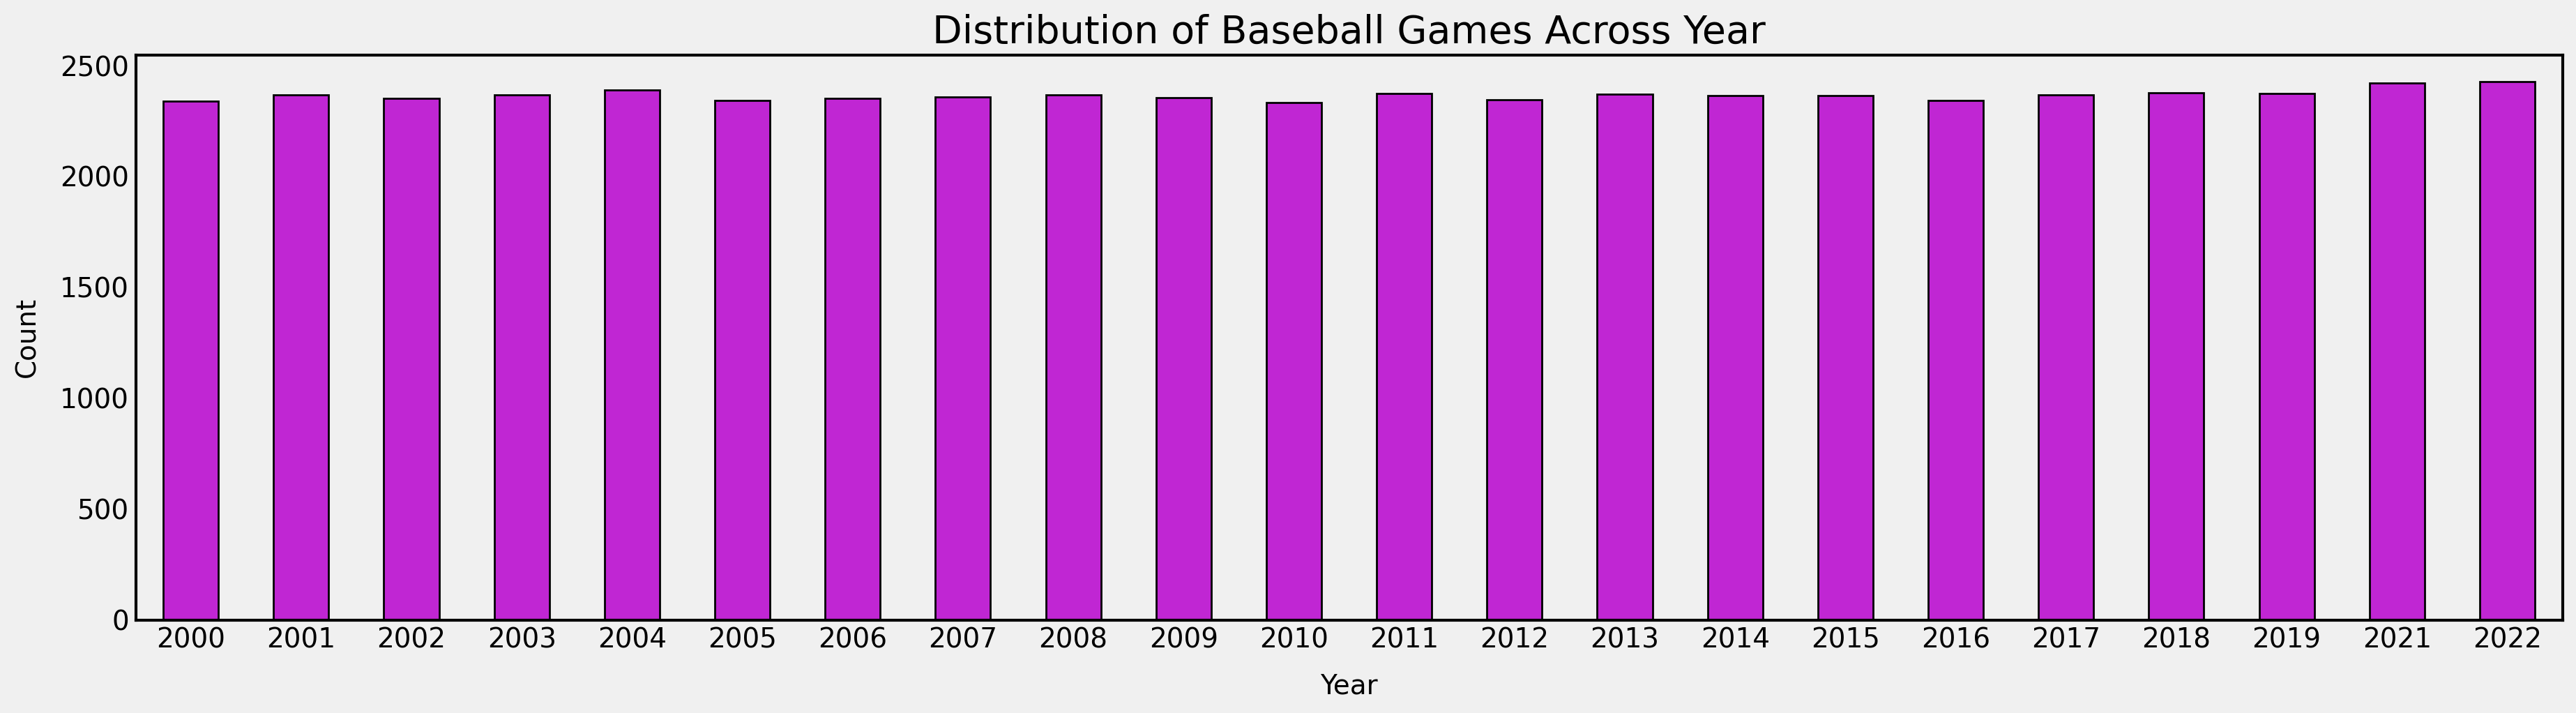

In [13]:
df['Year'] = df['Date'].apply(lambda d: d.year)
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 5),
                                                 color='#C026D3',
                                                 edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Year', size=20)
ax.set_xlabel('Year', labelpad=10, size=14)
ax.set_ylabel('Count', labelpad=10, size=14)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

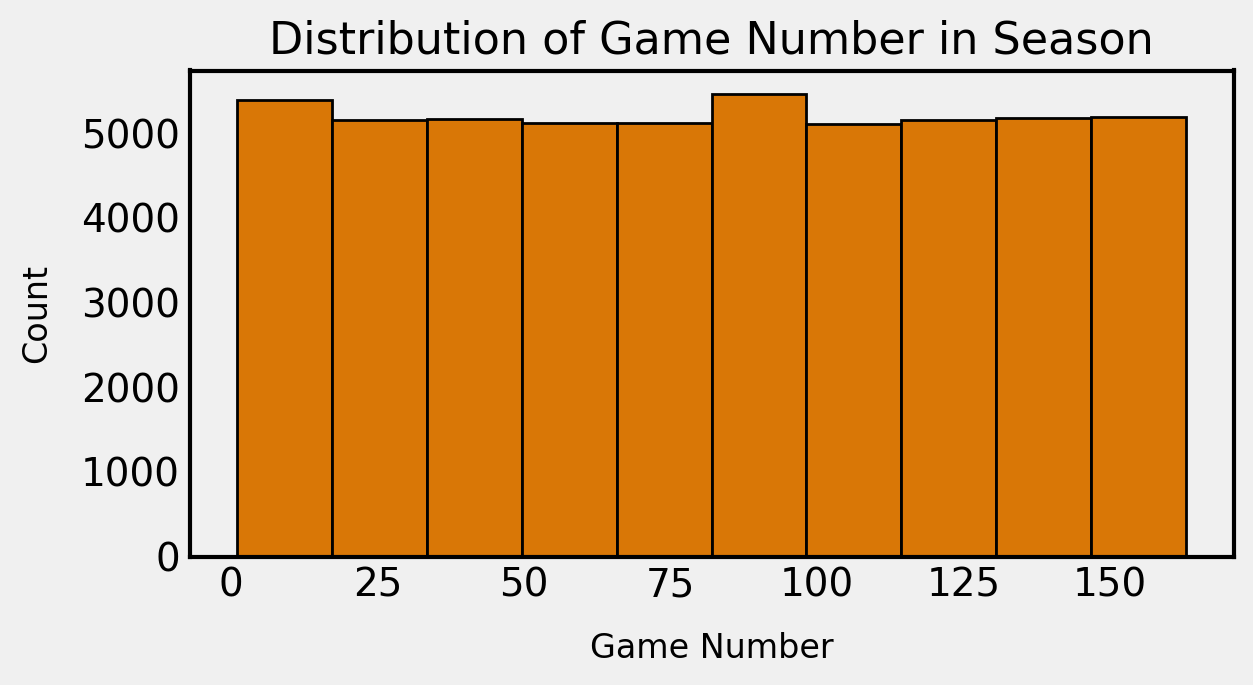

In [14]:
ax = df['Gm#'].plot(kind='hist', figsize=(6, 3),
                    color='#D97706', edgecolor='black',
                    linewidth=1)
ax.set_title('Distribution of Game Number in Season', size=16)
ax.set_xlabel('Game Number', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

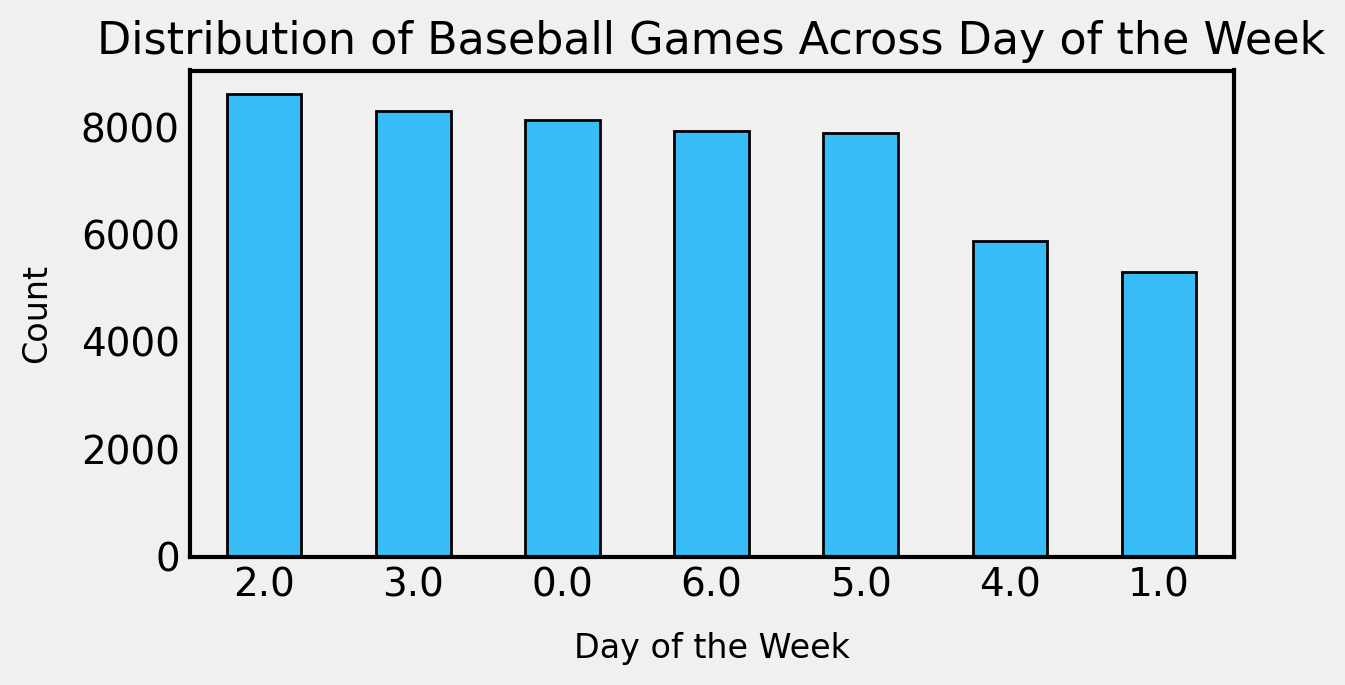

In [15]:
ax = df['DayofWeek'].value_counts().plot(kind='bar', figsize=(6, 3), color='#38BDF8',
                                         edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Day of the Week', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

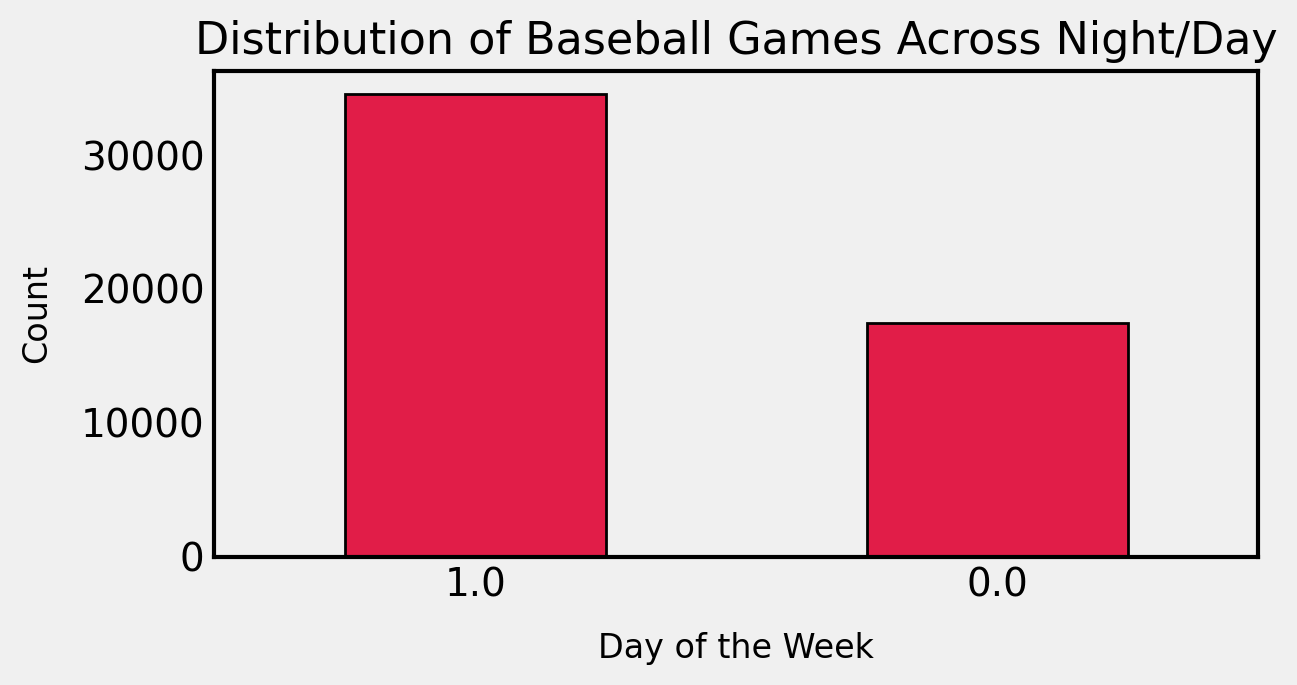

In [16]:
ax = df['DayNight'].value_counts().plot(kind='bar', figsize=(6, 3), color='#E11D48',
                                        edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Night/Day', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

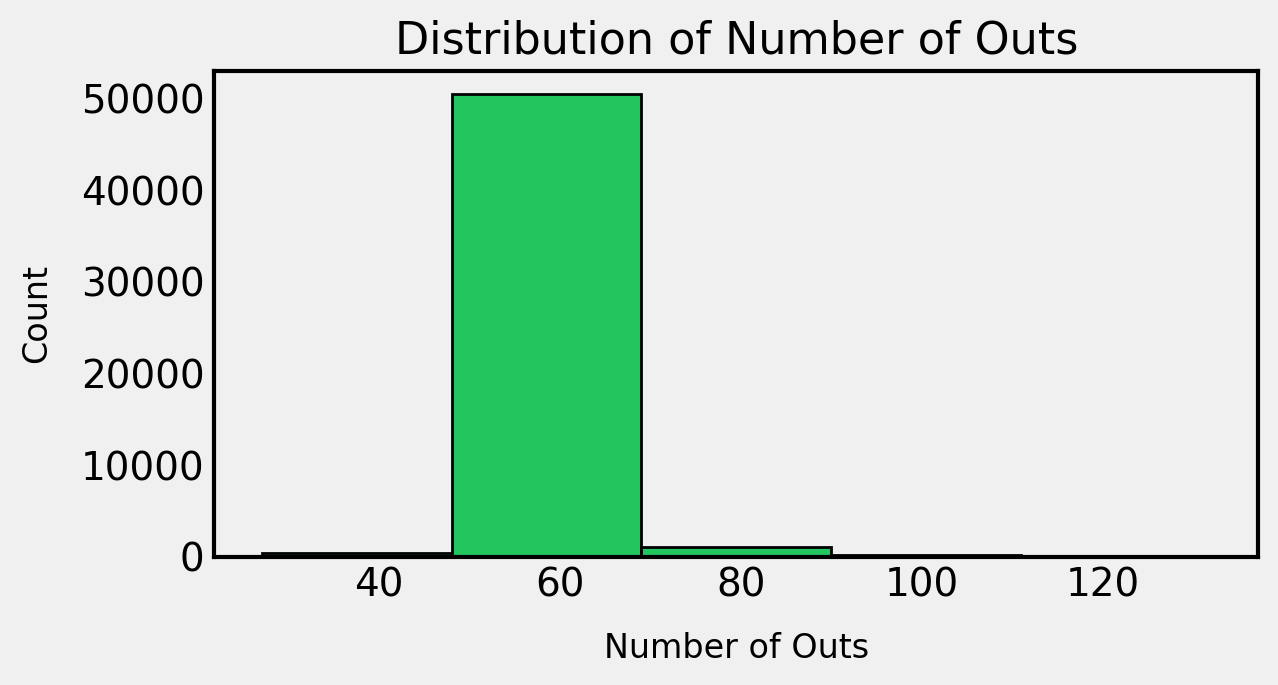

In [17]:
ax = df['NumberofOuts'].plot(kind='hist', figsize=(6, 3), color='#22C55E',
                             bins=5, edgecolor='black', linewidth=1)
ax.set_title('Distribution of Number of Outs', size=16)
ax.set_xlabel('Number of Outs', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

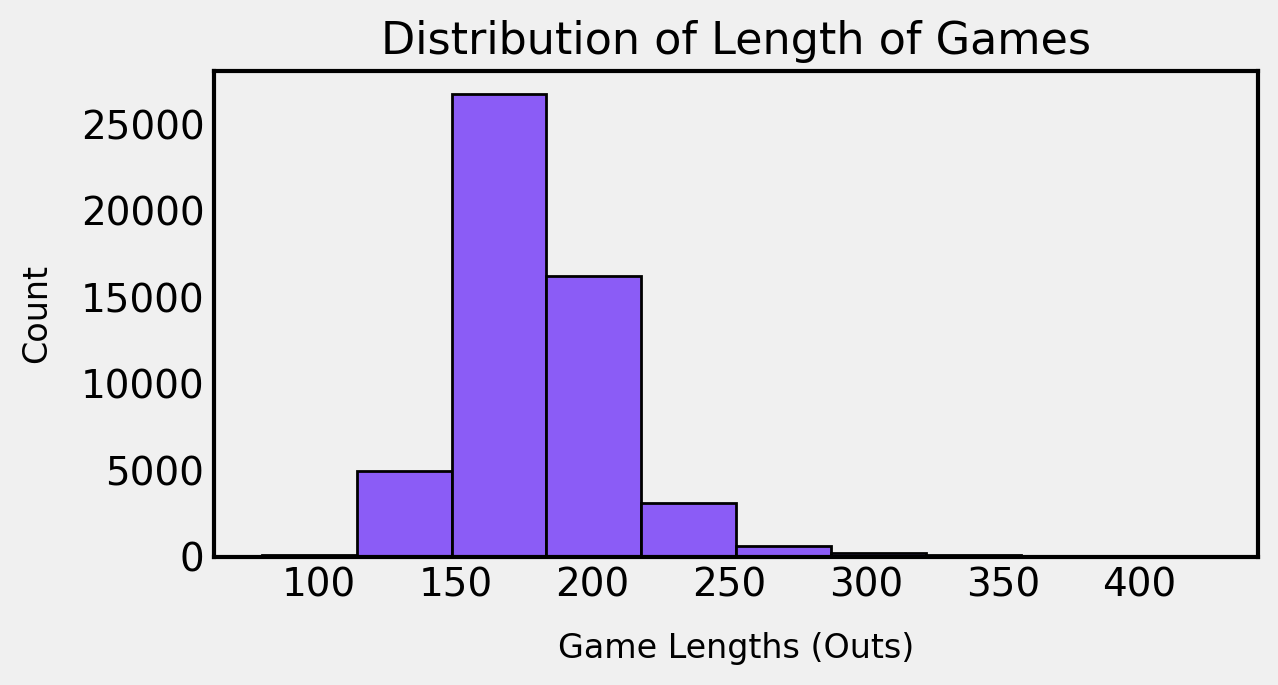

In [18]:
ax = df['LengthofGame'].plot(kind='hist', figsize=(6, 3), color='#8B5CF6', bins=10,
                             edgecolor='black', linewidth=1)
ax.set_title('Distribution of Length of Games', size=16)
ax.set_xlabel('Game Lengths (Outs)', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

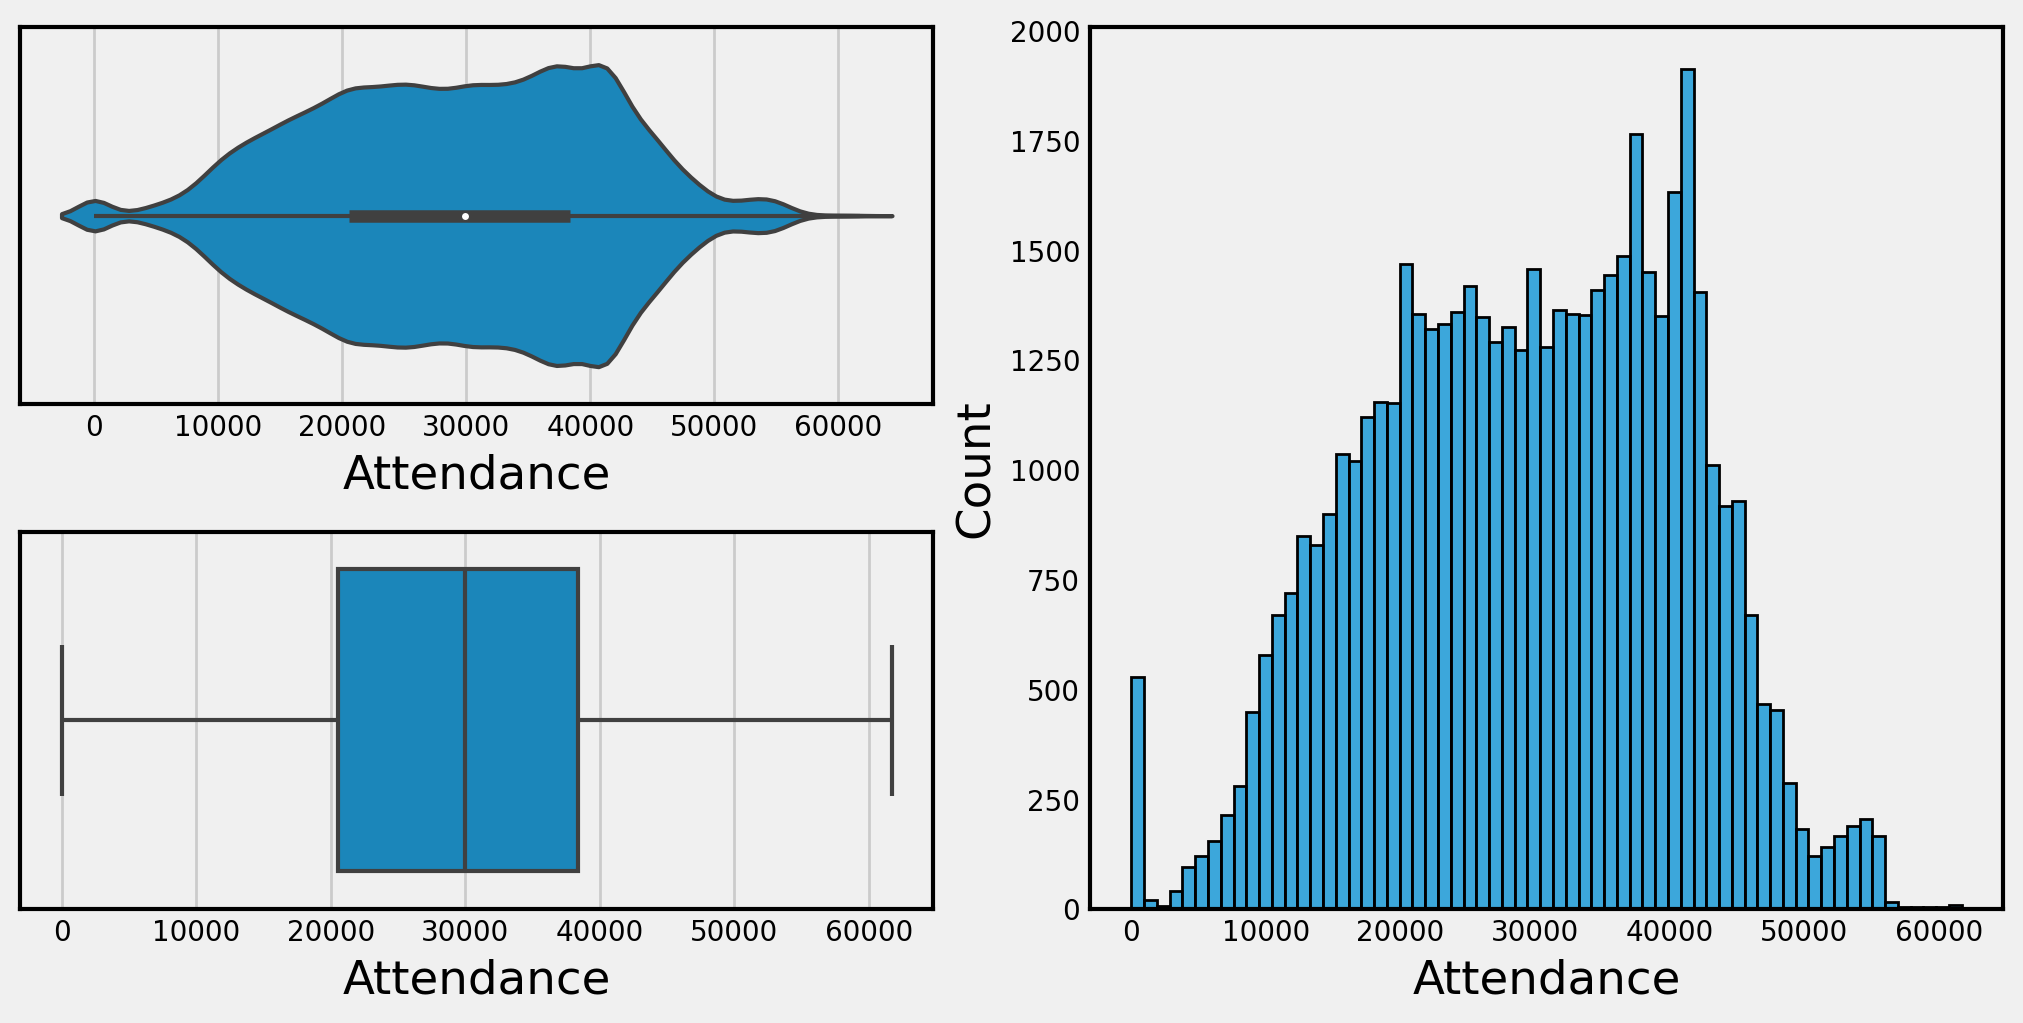

In [19]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 5), layout="constrained")
a = sns.violinplot(data=df, x='Attendance', linewidth=1.5, ax=axd['upper left'])
a1 = sns.boxplot(data=df, x='Attendance', linewidth=1.5, ax=axd['lower left'])
a2 = sns.histplot(data=df, x='Attendance', ax=axd['right'], edgecolor='black', linewidth=1)
a2.grid(False)
for k in axd.keys():
    axd[k].tick_params(axis='both', which='major', labelsize=10)

# Feature Relationships

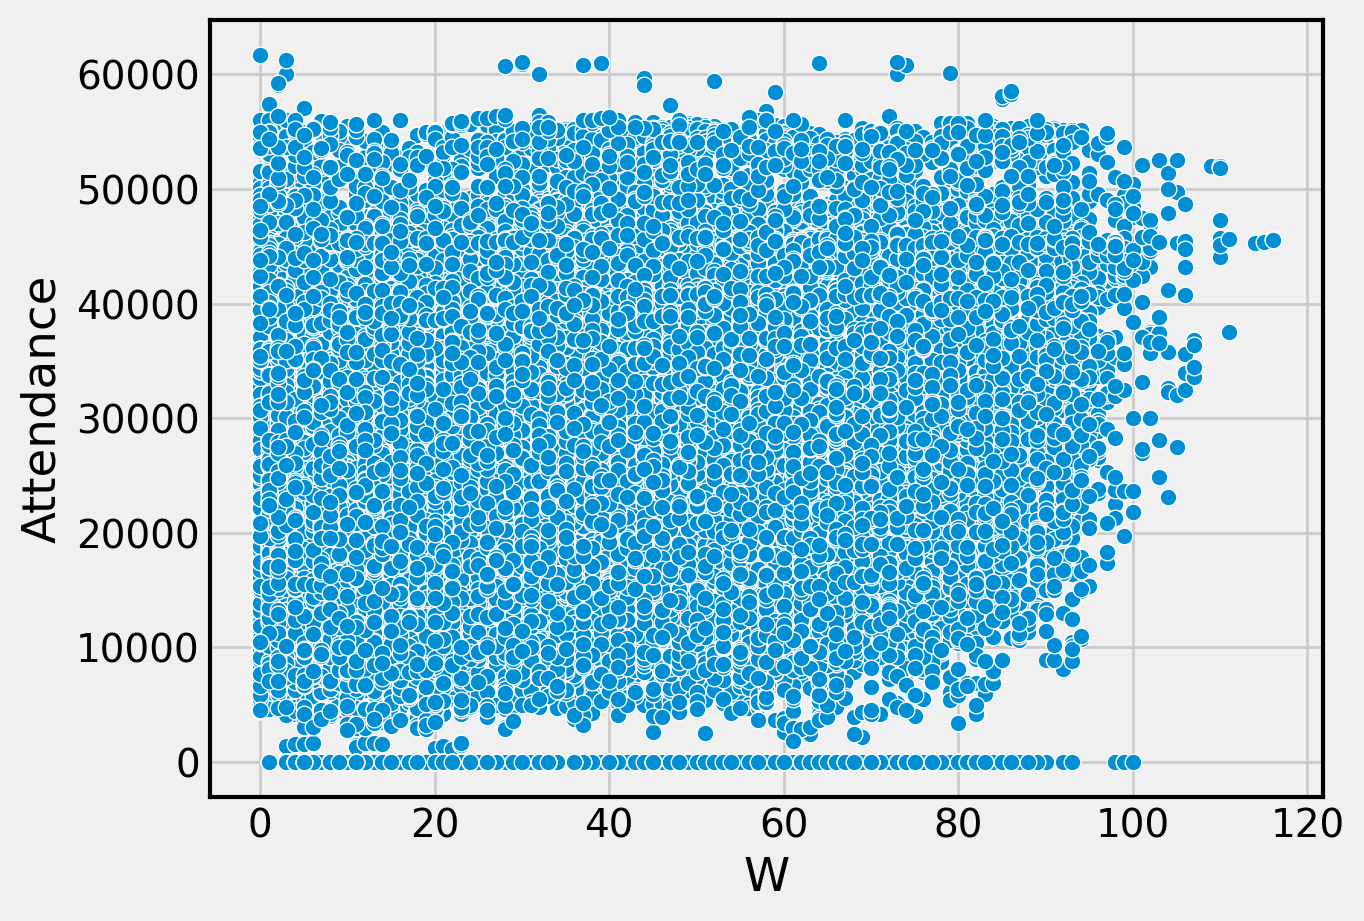

In [20]:
ax = sns.scatterplot(data=df, x='W', y='Attendance')

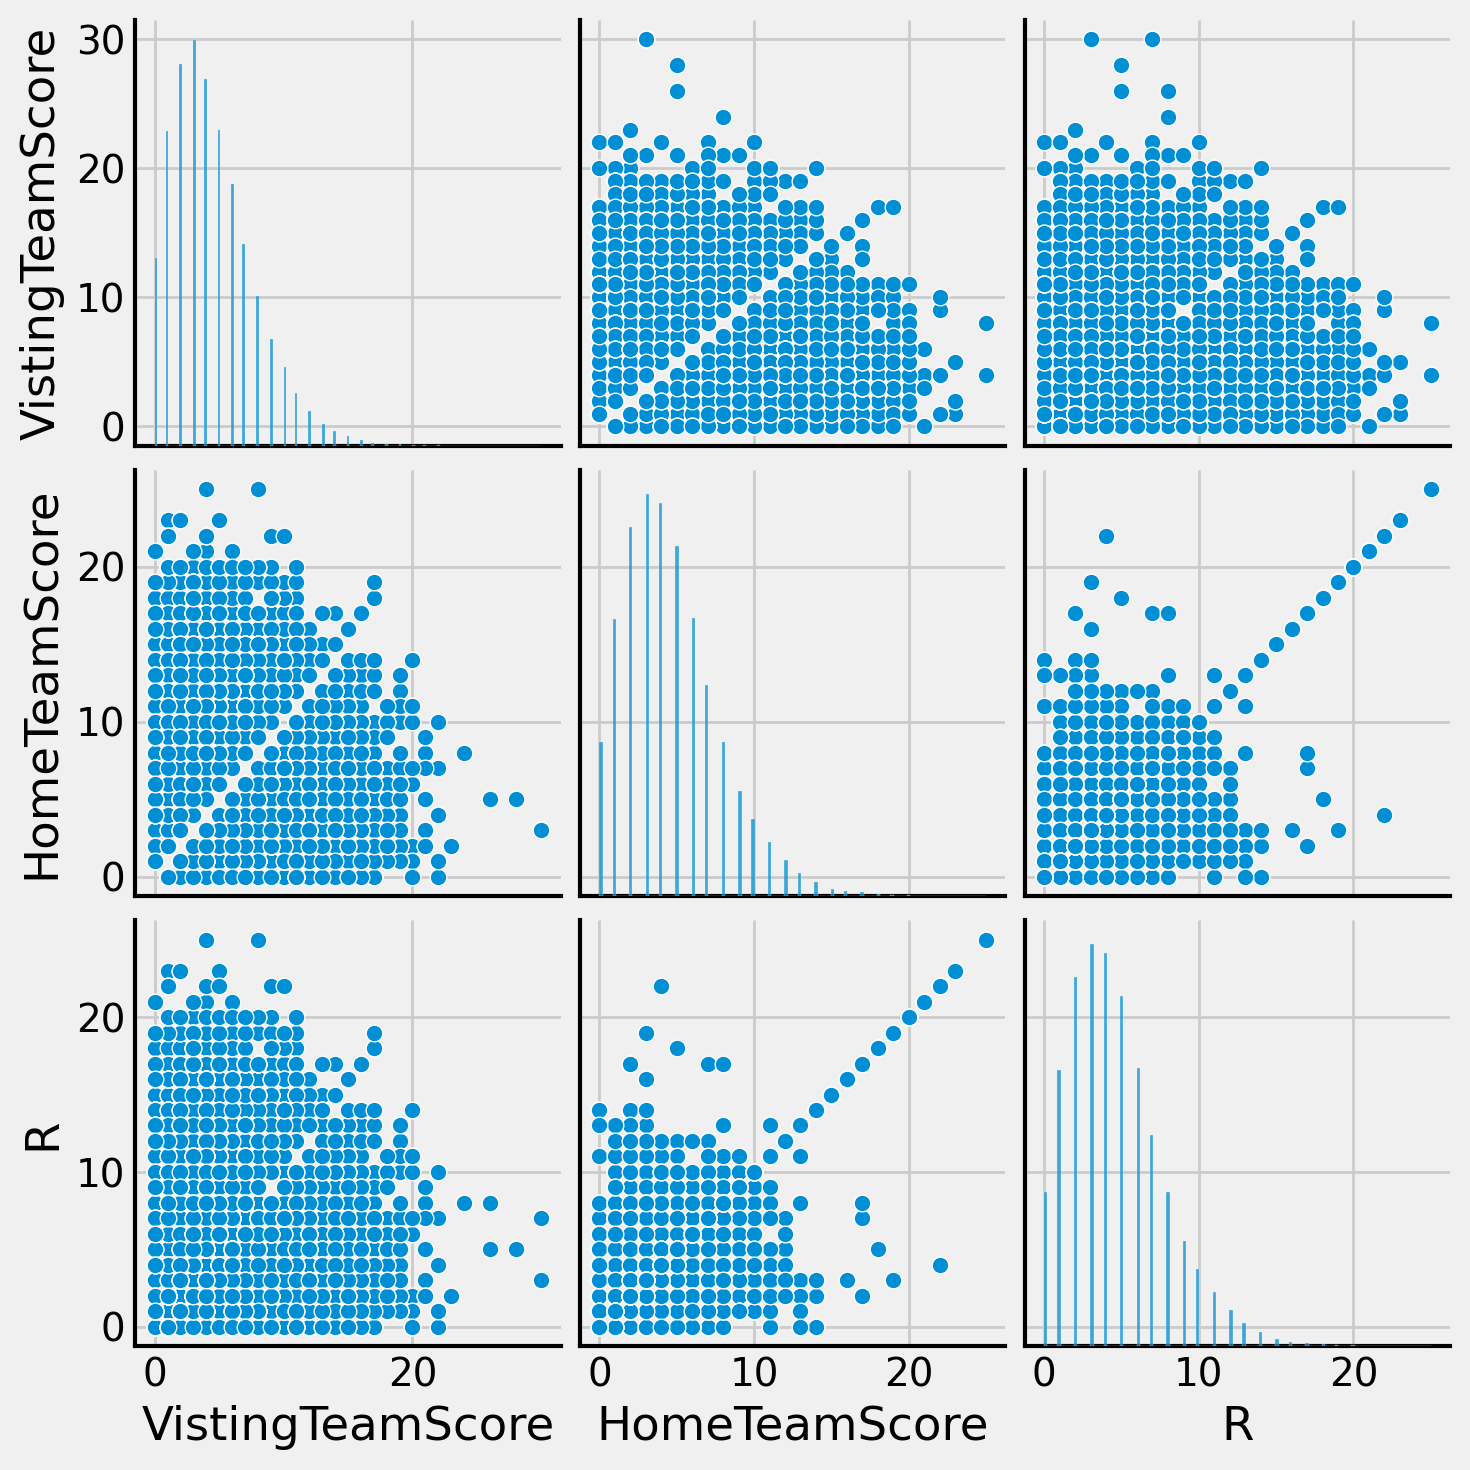

In [24]:
sns.pairplot(data=df,
             vars=['VistingTeamScore', 'HomeTeamScore', 'R'])

<Axes: >

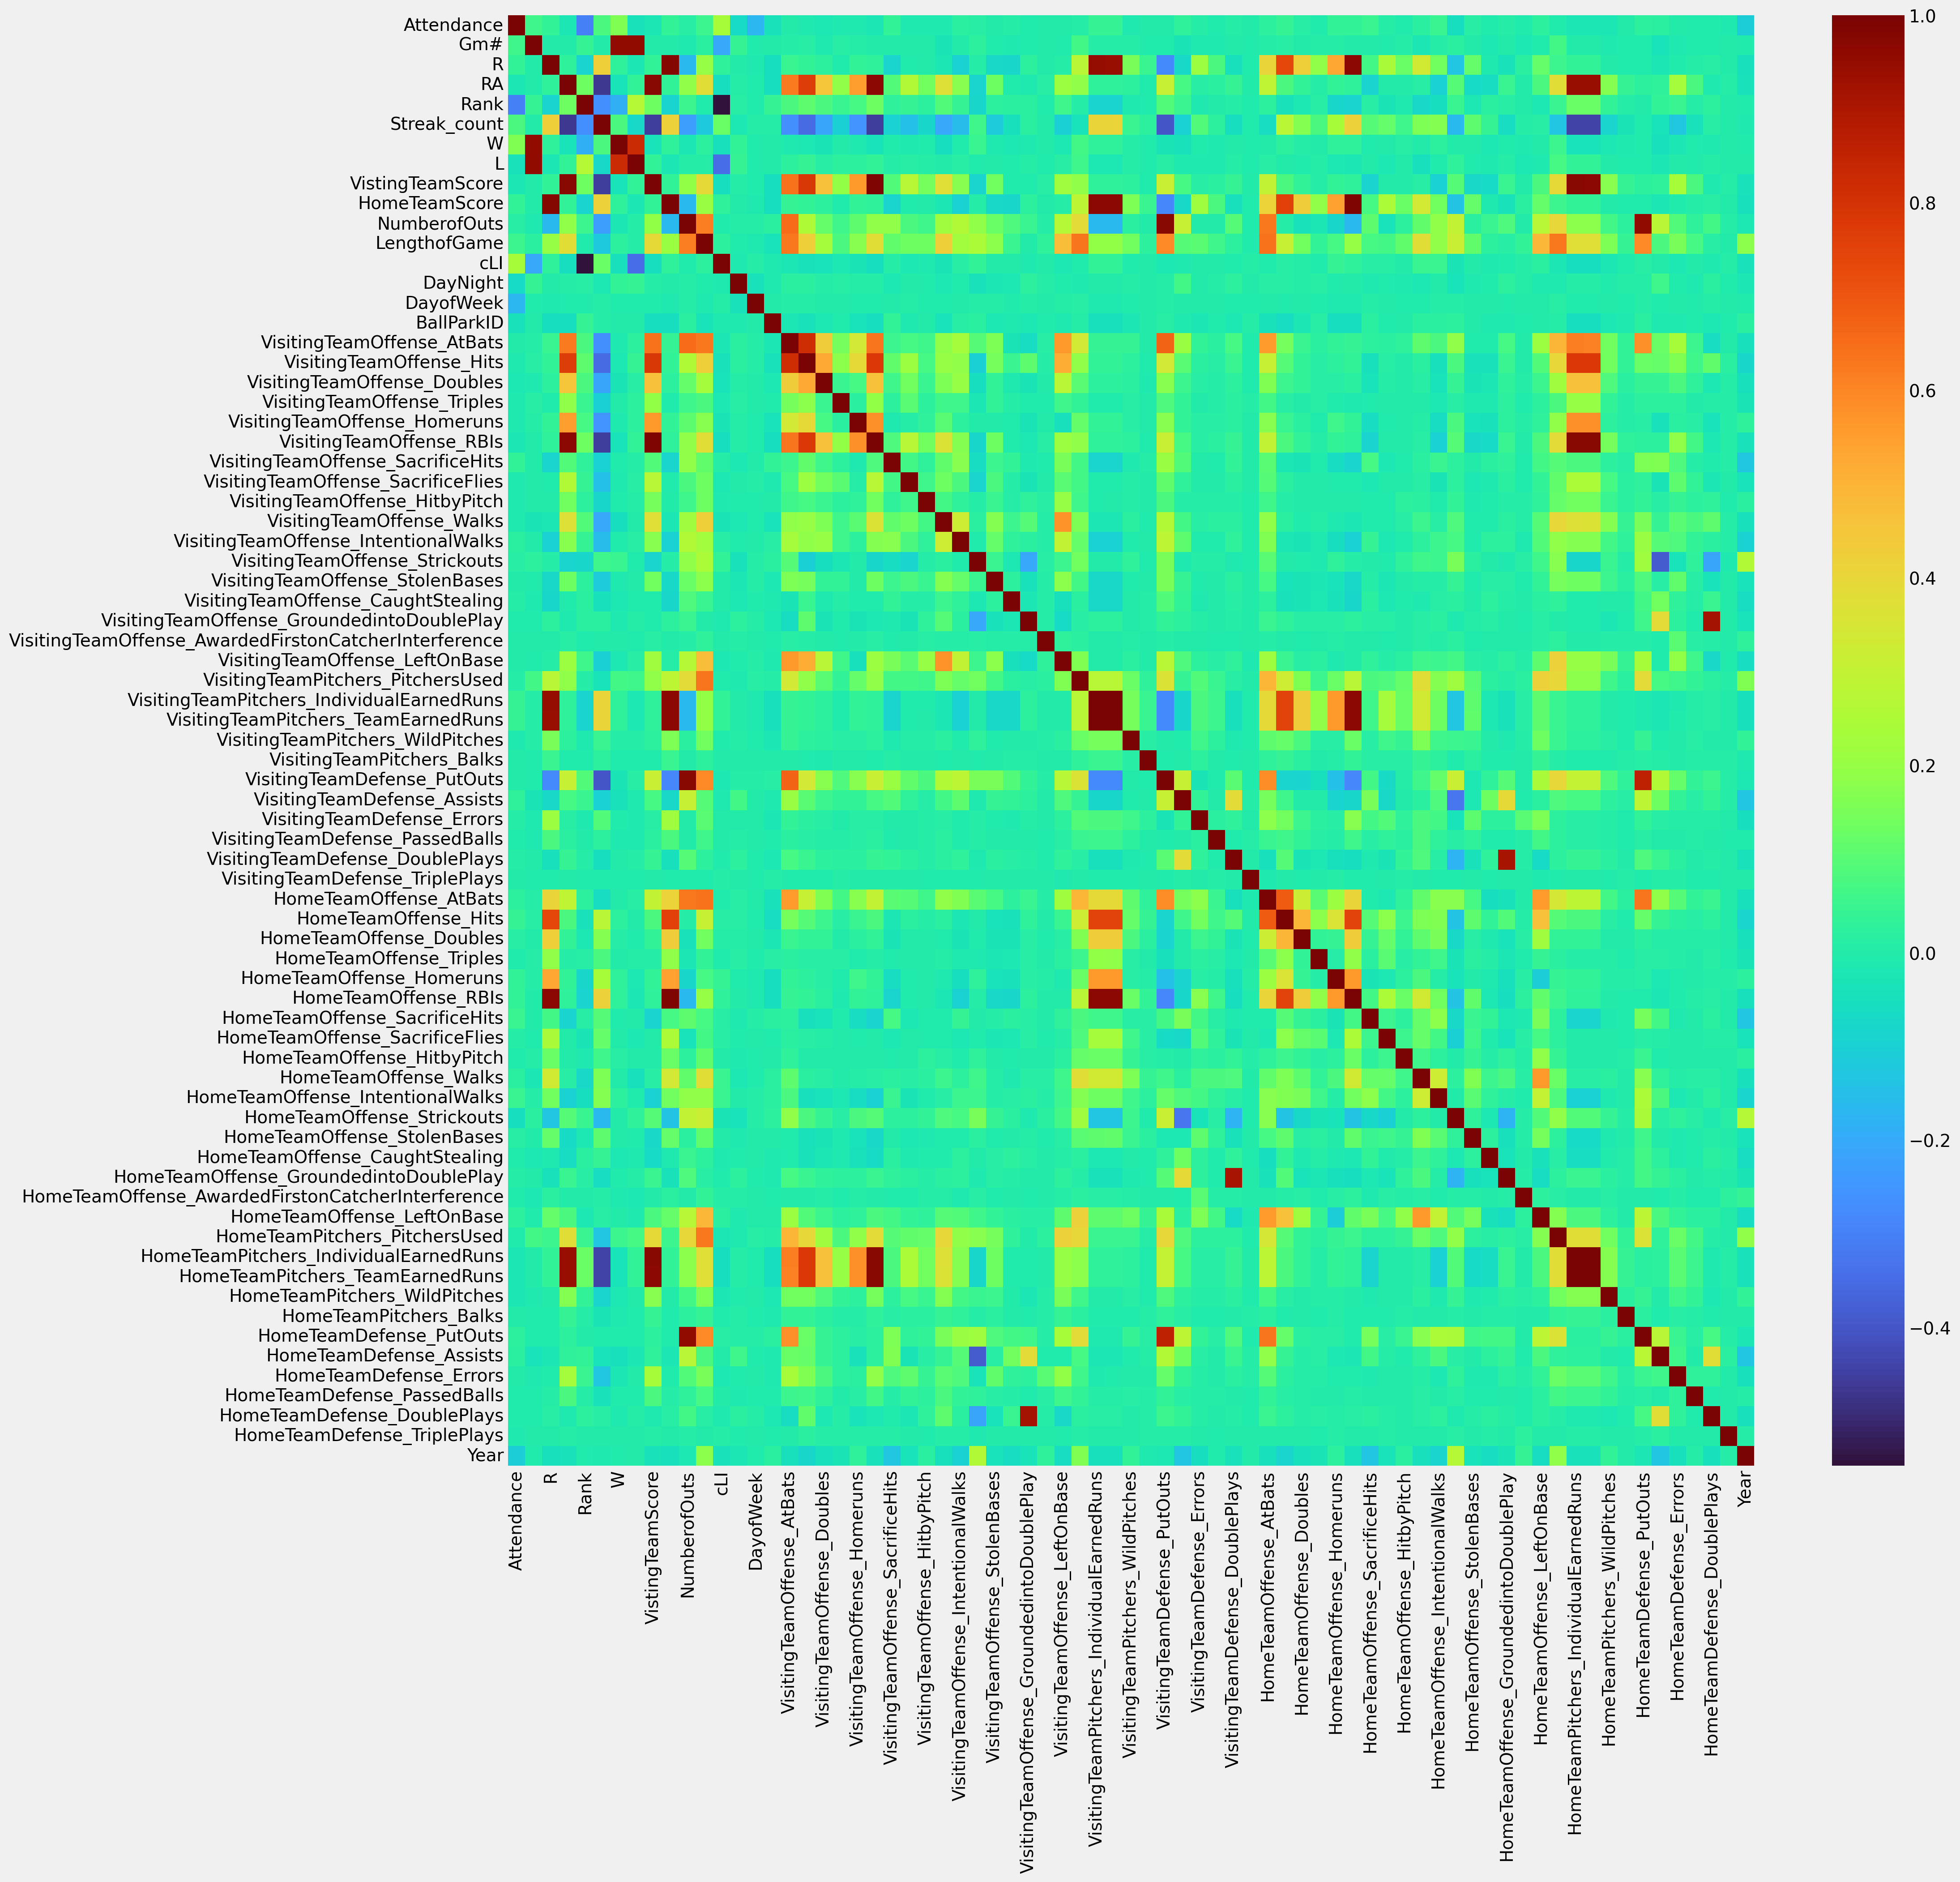

In [25]:
corr = df.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)

In [26]:
# filter by top 10 strongest correlations with attendance excluding attendance with itself
corr.loc[corr.index != 'Attendance', 'Attendance'].abs().sort_values(ascending=False)

Rank                                                     0.303365
cLI                                                      0.233754
DayofWeek                                                0.167087
W                                                        0.162274
Year                                                     0.107632
                                                           ...   
HomeTeamPitchers_Balks                                   0.001143
VisitingTeamDefense_TriplePlays                          0.001028
VisitingTeamOffense_AwardedFirstonCatcherInterference    0.000775
VisitingTeamPitchers_Balks                               0.000660
VisitingTeamOffense_AtBats                               0.000416
Name: Attendance, Length: 72, dtype: float64